## Enhancing Marketing Strategies Through Customer Segmentation and Retention Analysis


## Introduction to Customer Segmentation and Retention

Background and Context
- Supermarkets face intense competition and need to retain customers to maintain profitability.
- Customer segmentation and retention analysis help understand different customer groups and their behaviors, enabling personalized marketing strategies and improved engagement.

Objectives of the Analysis
- Customer Profiling: Develop detailed profiles of customer segments.
- Retention Insights: Analyze recency data to understand retention patterns.
- Strategic Recommendations: Provide actionable marketing strategies to enhance customer engagement and retention.

Scope and Methodology
- Stakeholders: Business and Marketing Strategy Manager.
- Data Understanding and Preparation.
- Customer Segmentation Insights.
- Analysis of Customer Retention and Recency.
- Strategic Marketing Recommendations.


## Data Understanding and Preparation - Description of the Dataset


In [151]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, shapiro, chi2_contingency
import datetime as dt


import warnings
warnings.filterwarnings("ignore")

The data can be accessed at the following link: [Customer Supermarket](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK), which has 2240 rows and 29 columns.

Content Attributes:

People:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products:
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion:

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place:

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month


In [152]:
# Reading a CSV file
df = pd.read_csv('supermarket_customers.csv', delimiter='\t')

# Displaying the first five rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Understanding and Preparation - Data Cleaning and Preparation Processes


In [153]:
# Print the number of rows and columns in the DataFrame 'df'
print(f'The number of rows & columns in the df dataset is {df.shape}')

# Display a concise summary of the DataFrame 'df', including the number of non-null entries and the data type of each column
df.info()

The number of rows & columns in the df dataset is (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 n

### Data Type Changes

To perform a more accurate and efficient analysis, it is necessary to change the data types for the following columns: Education, Marital_Status, and Dt_Customer.

- `Education` and `Marital_Status`:The Education and Marital_Status columns should be changed to categorical data types. This change will help in the data analysis by enabling more efficient analysis methods and a more precise representation of the data.

- `Dt_Customer`: The Dt_Customer column should be changed to a datetime data type. This change will facilitate analyses that involve dates, such as calculating the time since a customer's enrollment or other time-based analyses.

In [154]:
# Change Education and Marital_Status to categorical data types
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

# Change Dt_Customer to datetime data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [155]:
# Displaying the data after changing the categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Handling Missing Value


In [156]:
df.isna().sum()/df.shape[0]*100 # Percentage of missing values ​​in each column

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Identification of Missing Values:

- Since the Income column has less than 5% missing values, they can be handled by filling with the mean.

There are two options for handling missing values:

- Delete rows or columns containing missing values.
- Fill in missing data: Replace missing values with appropriate or close estimates based on related columns using domain knowledge or statistical relationships. If this is not possible, use the mean, median, or mode. Deleting data should be a last resort.

In [157]:
df_new = df.copy() # Used to create a separate copy of the original DataFrame
df_new['Income'].fillna(df['Income'].mean(), inplace=True) # Filling missing data with the 'mean' value in the 'Income' column
df_new[['Income']].isna().sum() # Number of missing data after filling

Income    0
dtype: int64

In [158]:
df_new.info() # Displaying the data after handling missing value of 'Income'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Checking Duplicate Update

In [159]:
# Set the display option for better readability
pd.set_option('display.max_colwidth', None)

# Data in each column
listItem = []
for col in df_new.columns:
    listItem.append([col, df_new[col].nunique(), df_new[col].unique()[:5]])  # Displaying first 5 unique values as a sample

# Create a DataFrame for column uniqueness
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)

# Check for duplicate rows
duplicate_rows = df_new.duplicated()
num_duplicates = duplicate_rows.sum()

# Display the uniqueness table
print("Uniqueness Table:")
print(tabel1Desc)

# Report on duplicate rows
print("\nNumber of duplicate rows:", num_duplicates)

# Optionally, display the duplicate rows if any
if num_duplicates > 0:
    print("\nDuplicate Rows:")
    print(df_new[duplicate_rows])
else:
    print("\nNo duplicate rows found")

Uniqueness Table:
            Column Name  Number of Unique  \
0                    ID              2240   
1            Year_Birth                59   
2             Education                 5   
3        Marital_Status                 8   
4                Income              1975   
5               Kidhome                 3   
6              Teenhome                 3   
7           Dt_Customer               663   
8               Recency               100   
9              MntWines               776   
10            MntFruits               158   
11      MntMeatProducts               558   
12      MntFishProducts               182   
13     MntSweetProducts               177   
14         MntGoldProds               213   
15    NumDealsPurchases                15   
16      NumWebPurchases                15   
17  NumCatalogPurchases                14   
18    NumStorePurchases                14   
19    NumWebVisitsMonth                16   
20         AcceptedCmp3              

The analysis revealed 0 duplicate rows in the dataset, ensuring data integrity and uniqueness across records.

### Checking Outliers

In [160]:
# Define a list of numerical columns to check for outliers
numerical = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

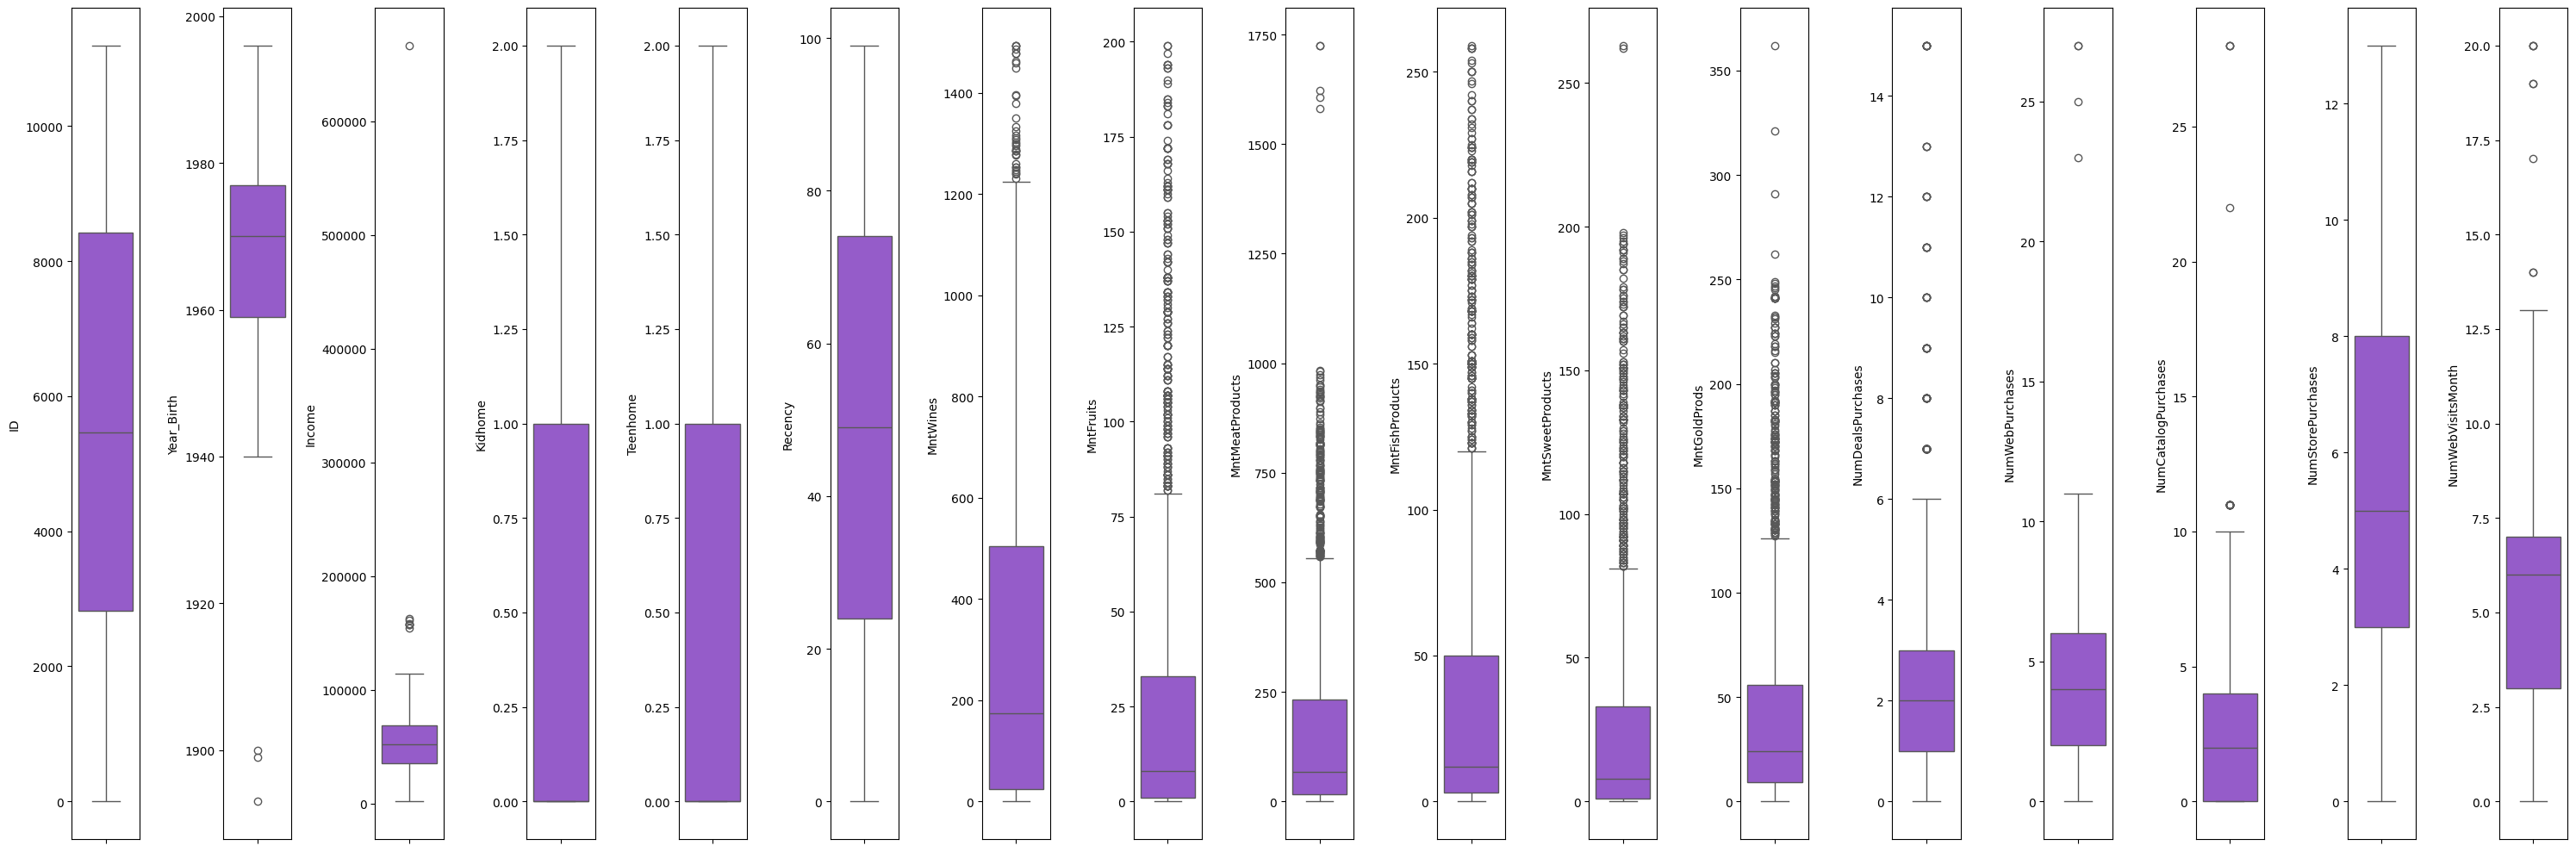

In [161]:
# Checking outlier using BOXPLOT
plt.figure(figsize=(30,10))

# Plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_new[features[i]], color='#964adb')
    plt.tight_layout()

The columns MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds contain numerous outliers. However, we will not drop them because high-spending customers (outliers) are often significant for business insights. They represent a small but valuable segment of customers who contribute a large portion of revenue. Dropping them could lead to a loss of crucial information about high-value customers.

### Data Transformation

#### Data Transformation - Change Marital Status Column



In [162]:
# Replace specific values in the 'Marital_Status' column of 'df' and assign the updated values to the 'Marital_Status' column in 'df_new'
# Group 'Together' and 'Married' into 'Relationship'
# Group 'Divorced', 'Widow', 'Alone', 'Absurd', and 'YOLO' into 'Single'
df_new.Marital_Status = df.Marital_Status.replace({'Together': 'Relationship',
                                                    'Married': 'Relationship',
                                                    'Divorced': 'Single',
                                                    'Widow': 'Single', 
                                                    'Alone': 'Single',
                                                    'Absurd': 'Single',
                                                    'YOLO': 'Single'})

The code replaces specific values in the Marital_Status column of df_new DataFrame with broader categories like 'Relationship' and 'Single'. This simplification aims to streamline customer data analysis and segmentation based on marital status.

#### Data Transformation - Change Education Column



In [163]:
# Replace specific values in the 'Education' column of 'df_new'
# Group 'Graduation', 'PhD', and 'Master' into 'Postgraduate'
# Group '2n Cycle' and 'Basic' into 'Undergraduate'
df_new["Education"] = df_new["Education"].replace({"Graduation": "Postgraduate", 
                                                    "PhD": "Postgraduate", 
                                                    "Master": "Postgraduate", 
                                                    "2n Cycle": "Undergraduate", 
                                                    "Basic": "Undergraduate"})

The code replaces values in the "Education" column of df_new to categorize educational levels into broader categories: "Graduate" for Graduation, PhD, and Master degrees, and "Undergraduate" for 2n Cycle and Basic education. It then prints the value counts of each category, providing a summary of the distribution of educational backgrounds among customers.

#### Data Transformation - Making Age Column

In [164]:
# Calculate the age of each customer
df_new['Age'] = 2014 - df['Year_Birth']

The code calculates the age of each customer by subtracting their birth year (Year_Birth) from 2014, which serves as the reference year for the calculation. This creates a new column Age in the df_new DataFrame, providing insights into the age distribution of customers based on their birth year.

#### Data Transformation - Making Childern Column

In [165]:
# Calculate the number of children
df_new['Children'] = df_new['Kidhome'] + df_new['Teenhome']

The code creates a new column named 'Children' in the DataFrame df_new. This column sums up the values from two existing columns, 'Kidhome' and 'Teenhome', representing the number of children in each household. The purpose is to consolidate the information about children in a more convenient single column for analysis or reporting purposes.

#### Data Transformation - Making Monthly Income Column

In [166]:
# Adding the 'MonthlyIncome' column by dividing the 'Income' column by 12
df_new['Monthly Income'] = df_new['Income'] / 12

The code snippet adds a new column named 'Monthly Income' to the DataFrame df_new. This column is created by dividing the existing 'Income' column by 12, which converts the annual household income of each customer into a monthly equivalent. This transformation facilitates further analysis and insights based on monthly income levels, enabling more granular examination of consumer spending patterns, budgeting behaviors, and financial planning considerations within the dataset.

#### Data Transformation - Making Monthly Spending Column

In [167]:
# Calculate total spent per customer over two years
df_new['Total Spending'] = df_new['MntWines'] + df_new['MntFruits'] + df_new['MntMeatProducts'] + df_new['MntFishProducts'] + df_new['MntSweetProducts'] + df_new['MntGoldProds']

# Calculate monthly spending by dividing the total spending by 24 (two years)
df_new['Monthly Spending'] = df_new['Total Spending'] / 24

The code first creates a new column named 'Total Spending' in the DataFrame df_new. This column is the sum of the values from six existing columns: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds'. Each of these columns represents the amount spent by customers on different product categories over two years. The purpose of creating the 'Total Spending' column is to calculate the overall spending of each customer across all product categories.

Next, the code creates another column named 'Monthly Spending' by dividing the 'Total Spending' by 24. This calculation provides the average monthly spending of each customer, assuming the data covers a period of two years. The 'Monthly Spending' column is useful for further analysis, such as identifying high-value customers on a monthly basis or understanding monthly spending behavior.

#### Data Transformation - Rename Column

In [168]:
# Rename specific columns in the 'df_new' DataFrame for better readability
df_new.rename(columns = {'MntWines':'Wines', 
                          'MntFruits':'Fruits',
                          'MntMeatProducts' : 'Meats',
                          'MntFishProducts' : 'Fish',
                          'MntSweetProducts' : 'Sweets',
                          'MntGoldProds' : 'Gold',
                          'NumDealsPurchases' : 'Deals Purchase',
                          'NumWebPurchases' : 'Web Purchase',
                          'NumCatalogPurchases' : 'Catalog Purchase',
                          'NumStorePurchases' : 'Store Purchase',
                          'NumWebVisitsMonth' : 'Web Visit',
                           'AcceptedCmp3' : 'Campaign 3',
                           'AcceptedCmp4' : 'Campaign 4',
                           'AcceptedCmp5' : 'Campaign 5',
                           'AcceptedCmp1' : 'Campaign 1',
                           'AcceptedCmp2' : 'Campaign 2'}, inplace = True)

In [169]:
df_new.head() # Display the first five rows of the 'df_new' DataFrame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Campaign 2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Monthly Income,Total Spending,Monthly Spending
0,5524,1957,Postgraduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,57,0,4844.833333,1617,67.375000
1,2174,1954,Postgraduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,60,2,3862.000000,27,1.125000
2,4141,1965,Postgraduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,49,0,5967.750000,776,32.333333
3,6182,1984,Postgraduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,30,1,2220.500000,53,2.208333
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,33,1,4857.750000,422,17.583333


The code renames several columns in the DataFrame df_new to more concise and readable names. This makes the dataset easier to understand and work with. The purpose is to improve the clarity of the dataset by replacing the original column names with shorter, more descriptive names that are easier to reference in analysis and visualization.

In [170]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                2240 non-null   int64         
 1   Year_Birth        2240 non-null   int64         
 2   Education         2240 non-null   category      
 3   Marital_Status    2240 non-null   category      
 4   Income            2240 non-null   float64       
 5   Kidhome           2240 non-null   int64         
 6   Teenhome          2240 non-null   int64         
 7   Dt_Customer       2240 non-null   datetime64[ns]
 8   Recency           2240 non-null   int64         
 9   Wines             2240 non-null   int64         
 10  Fruits            2240 non-null   int64         
 11  Meats             2240 non-null   int64         
 12  Fish              2240 non-null   int64         
 13  Sweets            2240 non-null   int64         
 14  Gold              2240 n

## Data Analysis - Customer Segmentation Insights

#### Comparing Monthly Income and Spending

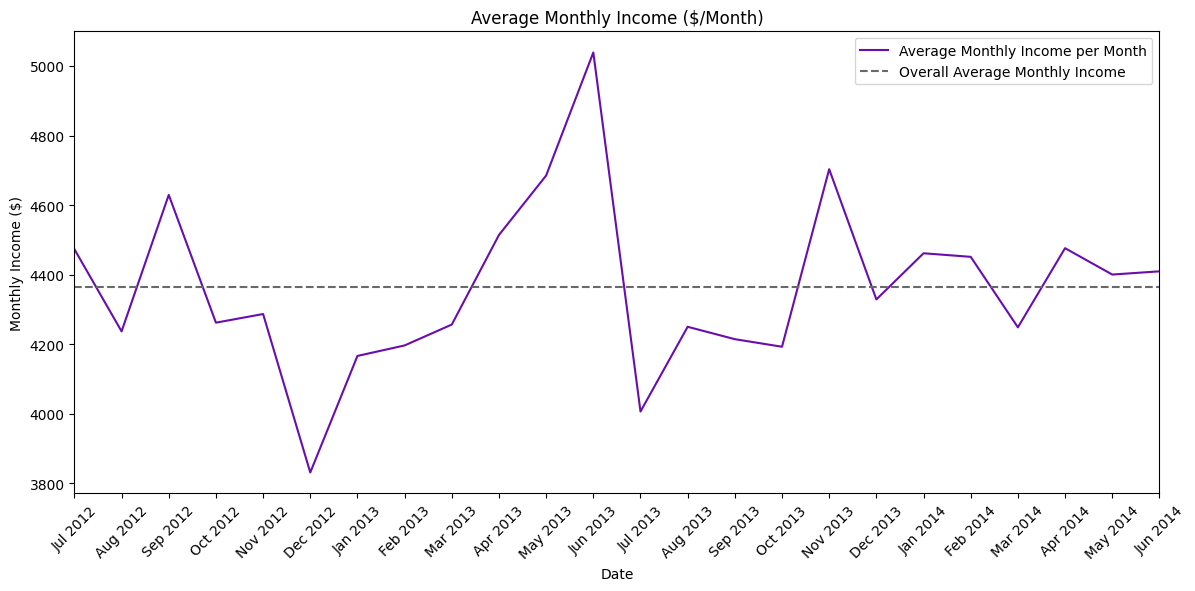

In [171]:
# Add year and month to df_new
df_new['year'] = pd.DatetimeIndex(df_new['Dt_Customer']).year
df_new['month'] = pd.DatetimeIndex(df_new['Dt_Customer']).month

# Create a new column 'new_date' with the desired date format
df_new['new_date'] = pd.to_datetime(df_new['year'].astype(str) + '/' + df_new['month'].astype(str) + '/01')

# Group by 'new_date' and calculate average MonthlyIncome per month
monthly_income = df_new.groupby(['new_date'])['Monthly Income'].mean()

# Plotting
plt.figure(figsize=(14, 6))
monthly_income.plot(color='#6a0dad', label='Average Monthly Income per Month')
plt.axhline(y=monthly_income.mean(), color='dimgray', linestyle='--', label='Overall Average Monthly Income')
plt.ylabel('Monthly Income ($)')
plt.xlabel('Date')
plt.title('Average Monthly Income ($/Month)', fontsize=12)
plt.legend()

# Set x-axis label positions and format
plt.xticks(ticks=monthly_income.index, labels=[dt.strftime('%b %Y') for dt in monthly_income.index], rotation=45)

plt.show()


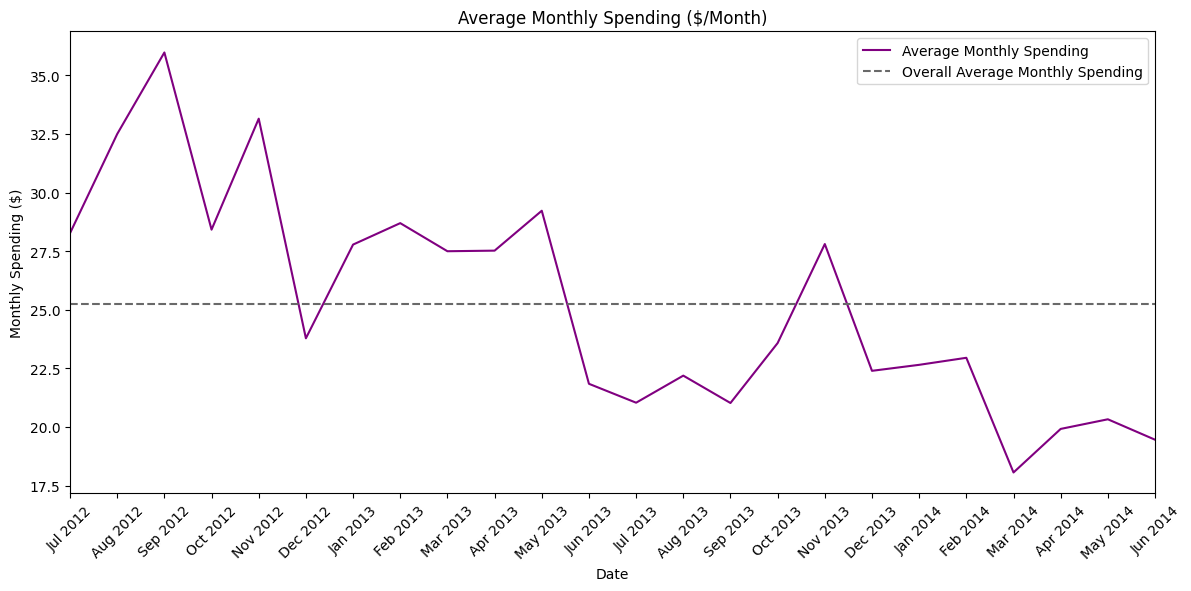

In [172]:
# Add year and month to df_new
df_new['year'] = pd.DatetimeIndex(df_new['Dt_Customer']).year
df_new['month'] = pd.DatetimeIndex(df_new['Dt_Customer']).month

# Create a new column 'new_date' with the desired date format
df_new['new_date'] = pd.to_datetime(df_new['year'].astype(str) + '/' + df_new['month'].astype(str) + '/01')

# Group by 'new_date' and calculate average TotalSpending per month
monthly_spending = df_new.groupby(['new_date'])['Monthly Spending'].mean()

# Plotting
plt.figure(figsize=(14, 6))
monthly_spending.plot(color='purple', label='Average Monthly Spending')
plt.axhline(y=monthly_spending.mean(), color='dimgray', linestyle='--', label='Overall Average Monthly Spending')
plt.ylabel('Monthly Spending ($)')
plt.xlabel('Date')
plt.title('Average Monthly Spending ($/Month)', fontsize=12)
plt.legend()

# Set x-axis label positions and format
plt.xticks(ticks=monthly_spending.index, labels=[dt.strftime('%b %Y') for dt in monthly_spending.index], rotation=45)

plt.show()


In [173]:
# Calculate the average percentage of total data
average_spending_percentage = (df_new['Monthly Spending'].sum() / df_new['Monthly Income'].sum()) * 100

print(f"Average Spending Percentage: {average_spending_percentage:.2f}%")

Average Spending Percentage: 0.58%


Based on the previous analysis and the insight that the average monthly spending percentage of 0.58% indicates a potentially low level of consumer expenditure relative to their income, here are additional strategies and insights:

Additional Analysis and Strategies

- `Diversification of Product Offerings:` Conduct market research to identify complementary products or services that align with consumer lifestyles and preferences. Introduce diverse product lines that cater to varying consumer needs and aspirations, thereby encouraging increased spending across multiple categories.
- `Behavioral Economics Approach:` Apply behavioral economics principles to incentivize consumer spending. Utilize tactics such as bundling products, creating scarcity through limited-time offers, and leveraging social proof to influence purchase decisions and stimulate higher transaction volumes.
- `Segment-Specific Strategies:` Segment customers based on spending behavior and preferences identified in the analysis. Develop targeted marketing campaigns and product promotions tailored to each segment’s unique characteristics and buying patterns, thereby maximizing engagement and conversion rates.
- `Promotion of High-Margin Products:` Identify and promote products with higher profit margins to enhance revenue growth. Implement strategies to highlight the value and benefits of premium offerings, encouraging consumers to trade up and increase their average transaction value.
- `Data-Driven Personalization:` Leverage customer data and analytics to personalize marketing communications and product recommendations. Implement predictive analytics to anticipate consumer needs and preferences, delivering relevant offers and experiences that drive incremental sales and customer satisfaction.
- `Cross-Selling and Upselling Initiatives:` Implement cross-selling and upselling strategies to increase the average order value. Recommend complementary products or upgrades based on consumer purchasing history and preferences, enhancing the overall shopping experience and maximizing revenue per transaction.
- `Continuous Monitoring and Optimization:` Establish a robust monitoring framework to track the impact of implemented strategies on consumer spending behaviors and business performance. Regularly analyze key performance indicators (KPIs) and consumer feedback to iterate and refine strategies for continuous improvement.
- `Collaboration with Suppliers and Partners:` Collaborate with suppliers and strategic partners to negotiate favorable terms, optimize inventory management, and introduce exclusive product offerings. Strengthening these relationships can lead to enhanced product availability, competitive pricing, and increased consumer appeal.

By integrating these additional strategies into the existing framework, businesses can foster a more dynamic and consumer-centric approach to revenue growth. This holistic approach not only aims to maximize consumer spending but also cultivates long-term customer loyalty and sustainable business growth in an evolving market landscape.

#### Analyzing Consumer Spending Patterns Across Different Age Groups

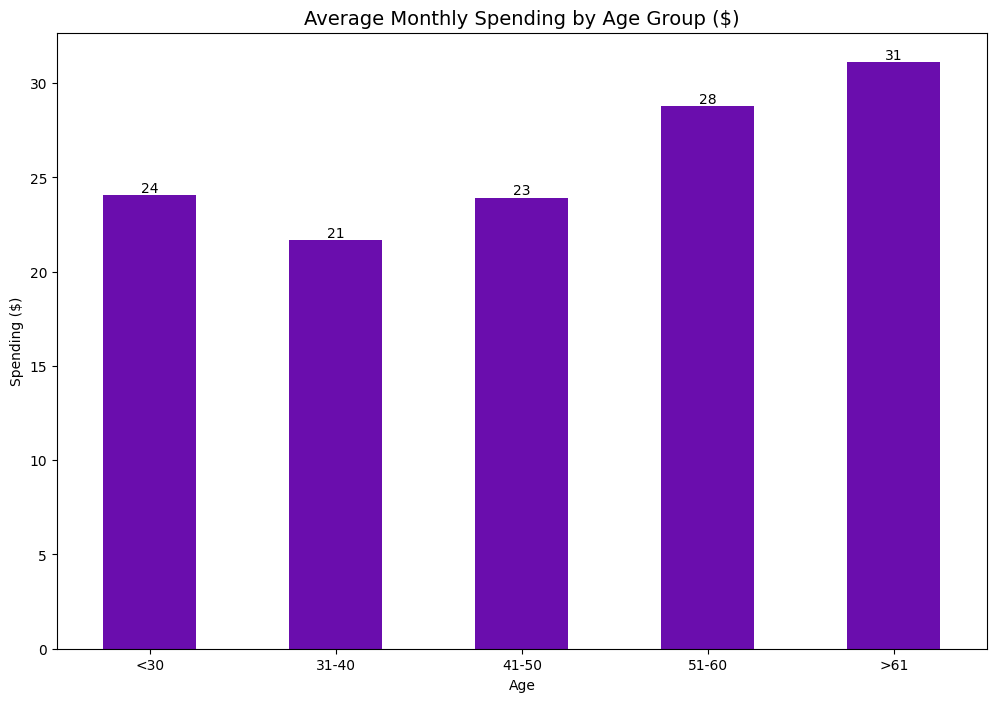

In [174]:
# Creating a list to categorize age groups
age_arr = []
for x in df_new['Age']:
    if x <= 30:
        age_arr.append('<30')
    elif x <= 40:
        age_arr.append('31-40')
    elif x <= 50:
        age_arr.append('41-50')
    elif x <= 60:
        age_arr.append('51-60')
    else:
        age_arr.append('>61')

# Adding the age group list to the dataframe
df_new['age_arr'] = age_arr

# Specifying the order of age groups for plotting
age_arr = ['<30', '31-40', '41-50', '51-60', '>61']

# Calculating the average spending for each age group
age_new = (df_new.groupby('age_arr')['Monthly Spending'].mean()).loc[age_arr]

# Plotting the average spending by age group
ax = age_new.plot(kind='bar', figsize=(12,8), legend=None, color='#6a0dad')
plt.xticks(rotation=0)
plt.ylabel('Spending ($)')
plt.xlabel('Age')
plt.title('Average Monthly Spending by Age Group ($)', fontsize=14)

# Adding labels on top of the bars
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points', color='black', fontsize=10)


From the graph, we observe that:
- The average spending increases progressively with age.
- Customers aged greater than 61 (>61) exhibit the highest average spending.

Based on these insights, the following strategies could be employed to maximize customer engagement and revenue across different age groups:

`Targeted Marketing for Older Age Groups:`

- Focus on High-Spending Segments: Given that older customers (51-60 and >61) are spending more, marketing campaigns should target these age groups with premium products and services.
- Loyalty Programs: Develop loyalty programs tailored to older customers, offering them exclusive deals and rewards based on their higher spending patterns.

`Engagement Strategies for Middle-Aged Groups:`

- Promotional Offers: For the 31-40 and 41-50 age groups, use promotional offers and discounts to encourage increased spending. Highlight products that cater to family needs and professional lifestyles.
- Cross-Selling and Upselling: Implement strategies to cross-sell and upsell related products, capitalizing on the established spending patterns within these age groups.

`Attracting Younger Customers:`

- Affordable Options: Develop product lines that are affordable for customers under 30. Consider bundle deals or entry-level products to attract younger customers.
- Engagement through Digital Channels: Younger customers are typically more engaged with digital marketing. Utilize social media, influencer marketing, and mobile-friendly campaigns to capture their attention.

`Personalized Customer Experiences:`

- Data-Driven Personalization: Leverage customer data to provide personalized recommendations and shopping experiences. Tailor messages and product suggestions based on previous spending habits and age-related preferences.
- Feedback and Adaptation: Regularly gather feedback from different age groups to understand their evolving needs and preferences, and adapt marketing strategies accordingly.
By implementing these strategies, the business can better engage customers across various age groups, thereby increasing overall customer satisfaction and boosting revenue.

#### Understanding Marital Status and Education Levels Composition in Customer Segmentation

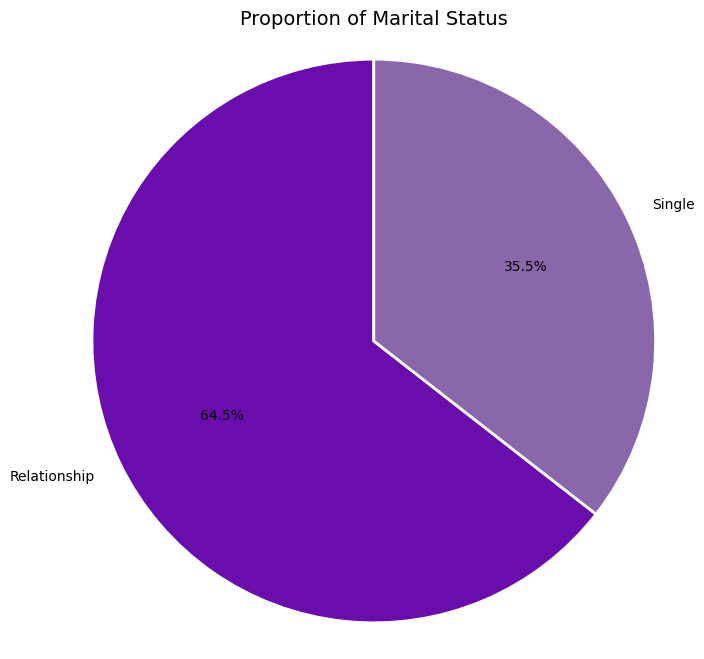

In [175]:
# Calculate the proportion of each Marital_Status category
marital_status_counts = df_new['Marital_Status'].value_counts()

# Define colors with the specified color
colors = [ '#6a0dad', '#8a67ab', '#aa85a9', '#cb9fa6', '#eba9a3']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Adding a title
plt.title('Proportion of Marital Status', fontsize=14)

# Ensuring the pie chart is a circle
ax.axis('equal')

# Display the plot
plt.show()


From the pie chart visualization, it's evident that the 'Relationship' category predominates over 'Single'. Here are the key insights from the analysis:

- `Dominance of 'Relationship' Category:` The 'Relationship' category, encompassing couples living together or married, holds a significant proportion. This indicates that a majority of customers in the dataset have stable marital or relationship statuses.
- `Target Market Potential:` Marketing strategies can focus on retaining and attracting more customers within the 'Relationship' category. This can be achieved by offering products or services that cater to family or couple needs and strengthening loyalty programs to maintain this large market share.
- `Further Segmentation:` While 'Relationship' dominates, further analysis is needed to understand variations in purchasing behavior and preferences among sub-groups within this category. This understanding can aid in more targeted and effective marketing strategies.
- `Opportunities with 'Single' Category:` Despite its smaller proportion in the dataset, there are opportunities to engage the 'Single' segment with tailored strategies. Further research can help uncover specific needs and preferences within the 'Single' segment to enhance engagement and conversion rates.

By delving into the marital status proportions, businesses can optimize marketing strategies and product development to accommodate the preferences and needs of each segment, thereby enhancing customer retention and overall business growth.

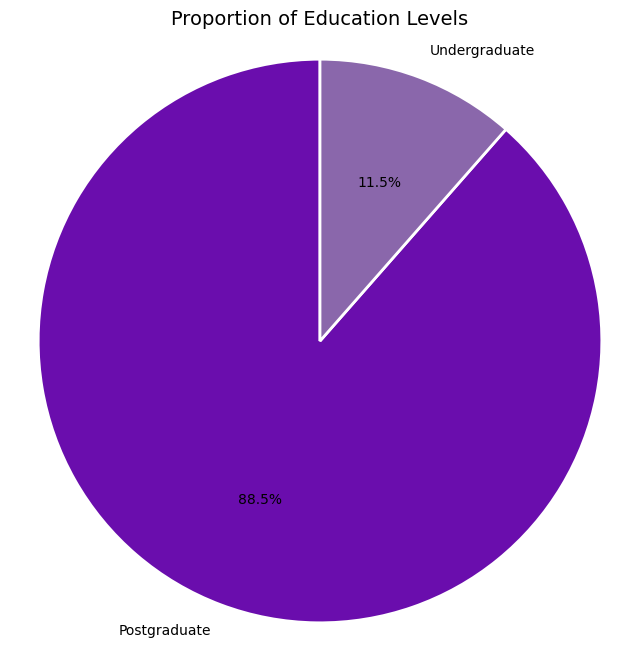

In [176]:
# Calculate the proportion of each Education category
education_counts = df_new['Education'].value_counts()

# Define colors with the specified color
colors = ['#6a0dad', '#8a67ab', '#aa85a9', '#cb9fa6', '#eba9a3']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Adding a title
plt.title('Proportion of Education Levels', fontsize=14)

# Ensuring the pie chart is a circle
ax.axis('equal')

# Display the plot
plt.show()

From the pie chart visualization, it's evident that the 'Postgraduate' category predominates over 'Undergraduate'. Here are the key insights from the analysis:

- `Dominance of 'Postgraduate' Category:` The 'Postgraduate' category holds a significant proportion (85%). This indicates that a majority of customers in the dataset have advanced education levels.
- `Target Market Potential:` Marketing strategies can focus on retaining and attracting more customers within the 'Postgraduate' category. This can be achieved by offering premium products or services that appeal to highly educated individuals and strengthening loyalty programs to maintain this large market share.
- `Further Segmentation:` While 'Postgraduate' dominates, further analysis is needed to understand variations in purchasing behavior and preferences among sub-groups within this category. This understanding can aid in more targeted and effective marketing strategies.
- `Opportunities with 'Undergraduate' Category:` Despite its smaller proportion in the dataset, there are opportunities to engage the 'Undergraduate' segment with tailored strategies. Further research can help uncover specific needs and preferences within the 'Undergraduate' segment to enhance engagement and conversion rates.

By delving into the education level proportions, businesses can optimize marketing strategies and product development to accommodate the preferences and needs of each segment, thereby enhancing customer retention and overall business growth.

`Combined Analysis of Marital Status and Education Levels`

The majority of customers are in the 'Relationship' category and have 'Postgraduate' education levels. This suggests that a significant portion of the customer base consists of educated couples or individuals in stable relationships. Marketing strategies should prioritize this dominant group by offering premium products or services that cater to their sophisticated tastes and family-oriented needs.

`Target Market Potential:`

- For 'Relationship' and 'Postgraduate': Focus on products and services that appeal to educated couples or families, such as family vacation packages, educational products for children, or high-end home appliances.
- For 'Relationship' and 'Undergraduate': Although smaller, this segment may be interested in affordable yet high-quality family-oriented products, entry-level luxury items, or career advancement tools.

`Further Segmentation:`

- Conduct detailed segmentation within the 'Relationship' and 'Postgraduate' category to uncover variations in purchasing behavior. For example, consider age, income level, and specific interests to tailor marketing efforts.
- Within the 'Single' and 'Postgraduate' segment, identify the specific needs of single, highly educated individuals, such as professional development courses, solo travel packages, or luxury lifestyle products.

`Opportunities with 'Single' and 'Undergraduate' Categories:`

- Although these segments are smaller, they present unique opportunities for engagement. For 'Single' and 'Undergraduate' customers, consider marketing affordable lifestyle products, social events, or educational services that can help them advance their careers or personal lives.
- Tailored strategies for 'Single' and 'Postgraduate' individuals might include networking events, high-end personal development programs, or exclusive memberships.

`Cross-Segment Marketing:`

- Leverage insights from both marital status and education level to create cross-segment marketing strategies. For instance, design campaigns that appeal to both 'Relationship' and 'Single' customers by highlighting different product benefits tailored to their education levels.

Conclusion:

- By combining the insights from marital status and education levels, businesses can develop more nuanced and effective marketing strategies. This approach ensures that products and services are aligned with the preferences and needs of each customer segment, thereby enhancing customer satisfaction, retention, and overall business growth.

Actionable Recommendations:
- Develop Personalized Marketing Campaigns: Create campaigns that specifically target 'Relationship' and 'Postgraduate' customers with premium offerings, while also addressing the unique needs of 'Single' and 'Undergraduate' segments.
- Enhance Customer Segmentation: Use advanced analytics to further segment the customer base, identifying key behavioral and demographic traits that can inform marketing strategies.
- Strengthen Loyalty Programs: Design loyalty programs that reward both 'Relationship' and 'Single' customers, with a focus on educational achievements and lifestyle preferences.
- Product Development: Tailor product development to meet the demands of educated customers, ensuring high quality and relevance to their lifestyles.
By integrating insights from both marital status and education level proportions, businesses can create more targeted and effective marketing strategies that drive engagement and growth.

#### Holiday Magic: Winning Over Customers with Strategic Family Packages

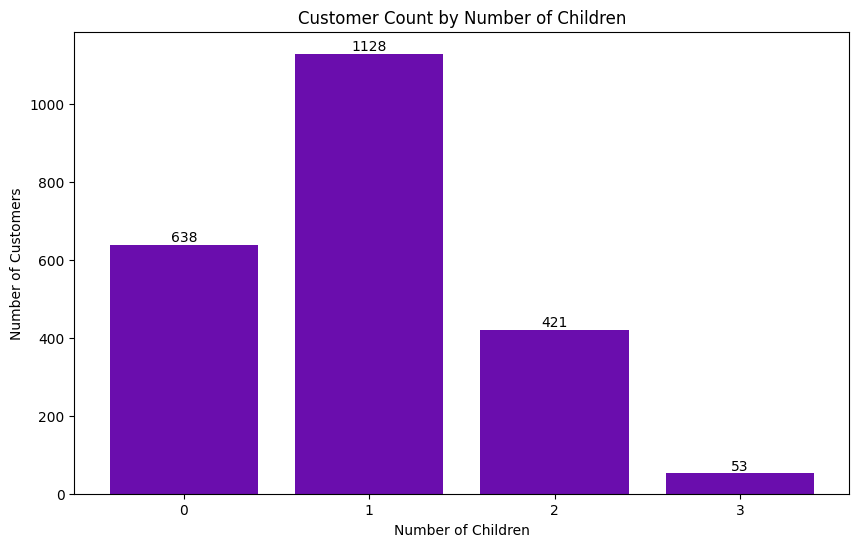

In [177]:
# Count the number of customers based on the number of children
children_counts = df_new['Children'].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(children_counts.index, children_counts.values, color='#6a0dad')

# Add title and labels
plt.title('Customer Count by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Customers')
plt.xticks(children_counts.index)  # Set x-ticks to the unique values in 'Children' column

# Annotate bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

The results indicate that customers with one child outnumber those without children, with two children, and with three children. This suggests that the group of customers with one child holds significant influence in purchasing patterns or consumer preferences within the supermarket dataset. Such analysis provides insights for marketing teams to tailor more specific strategies or adjust product offerings that better suit the preferences of this customer segment.

Furthermore, this data highlights the potential for implementing holiday package promotions. Marketing teams could develop targeted promotional campaigns, such as offering holiday packages to popular destinations as part of a purchase incentive, particularly for customers with one child who form a significant segment of the customer base.

#### Targeted Treats: Maximizing Profit with Family-Focused Products

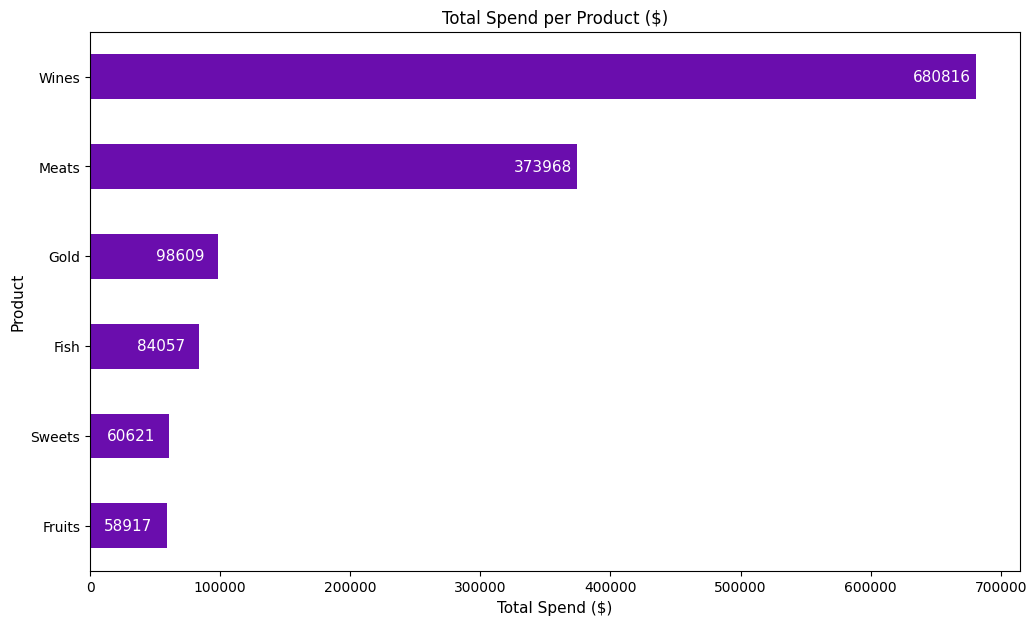

In [178]:
plt.figure(figsize=(12,7))
ax = df_new[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Gold']].sum().sort_values(ascending=True).plot(kind='barh', color='#6a0dad')
for p in ax.patches:
    number = '{}'.format(int(p.get_width()))
    ax.annotate(number, (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center',
                xytext=(-45,0), textcoords='offset points', color='white', fontsize=11)
ax.set_title('Total Spend per Product ($)', fontsize=12)
ax.set_xlabel('Total Spend ($)', fontsize=11)
ax.set_ylabel('Product', fontsize=11)

# Display the plot
plt.show()

The bar chart above reveals that the highest spending is on wines, meats, and gold. Conversely, spending on fish, sweets, and fruits is significantly lower. Additionally, our previous analysis indicates that the monthly spending is only 0.58% of the total monthly income. This suggests that customers might be allocating a minimal portion of their budget to these categories.

Given the low spending on family-related products such as fish, sweets, and fruits, there is a clear opportunity to develop and promote products that cater to family needs. This aligns with our findings regarding the influence of customers with one child, highlighting the potential to create targeted marketing strategies to increase spending in these areas.

Action Plan:

`Expand Family-Friendly Product Lines:`

- Introduce New Products: Launch new products that appeal to families, such as healthy snack options, family meal kits, and kid-friendly fruits and vegetables.
- Promote Existing Family Products: Increase visibility and availability of existing products that cater to families, such as bulk packaging for fruits, fish, and sweets.

`Targeted Marketing Campaigns:`

- Holiday Package Promotions: Develop promotional campaigns offering holiday packages for families as part of a purchase incentive, particularly focusing on customers with one child.
- Family-Centric Advertisements: Create marketing materials that highlight the benefits of family-friendly products, emphasizing convenience, health benefits, and cost savings.

`In-Store and Online Engagement:`

- Family Events and Workshops: Organize events and workshops aimed at families, such as cooking classes using family-friendly products, tasting events, and nutrition seminars.
- Enhanced Online Experience: Improve the online shopping experience with sections dedicated to family needs, offering tailored recommendations, and easy-to-find family-friendly products.

`Collaborations and Partnerships:`

- Partner with Schools and Community Centers: Collaborate with local schools and community centers to promote healthy eating habits and provide special offers to families.
- Collaborate with Health Experts: Partner with nutritionists and pediatricians to endorse family-friendly products and provide expert advice on healthy family eating.

`Loyalty Programs and Incentives:`

- Family Loyalty Programs: Develop loyalty programs that reward families for their purchases, offering points, discounts, and exclusive family-oriented deals.
- Incentives for Bulk Purchases: Provide incentives for bulk purchases of family-friendly products, such as discounts or free items with large orders.

By implementing these strategies, we can better cater to the needs of families, ultimately driving revenue growth through increased spending on products that support family needs. This approach not only addresses current spending patterns but also fosters long-term customer loyalty and satisfaction.

#### Beyond the Checkout: Unveiling Opportunities in Store and Web Purchases

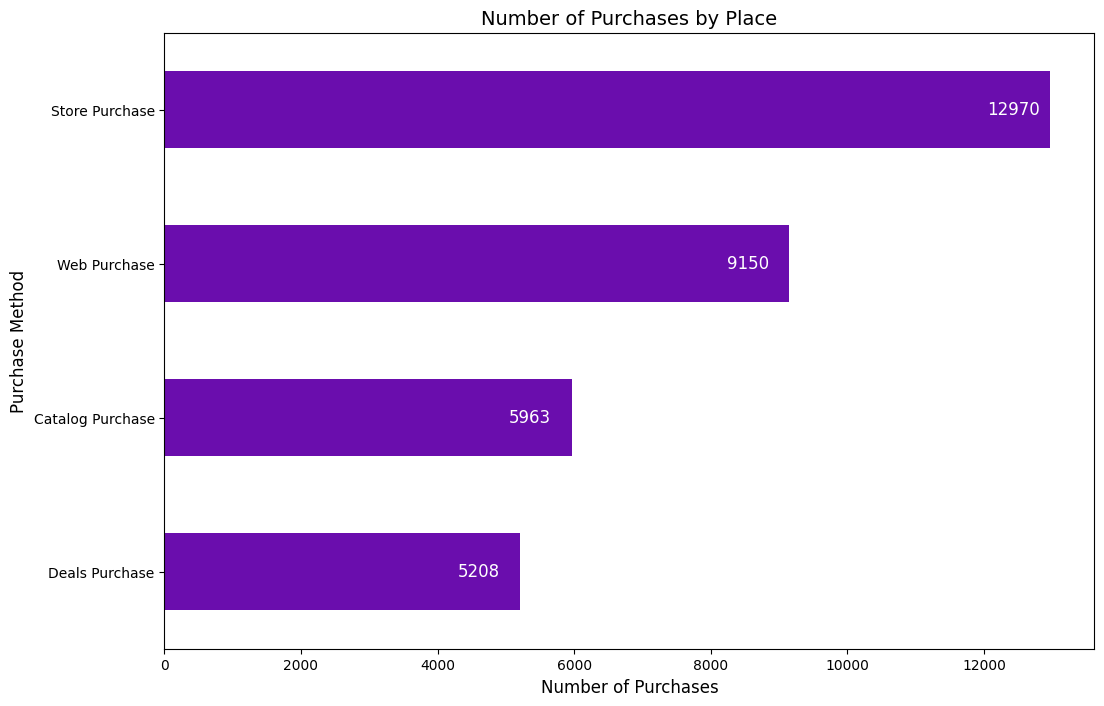

In [179]:
plt.figure(figsize=(12,8))
ax = df_new[['Deals Purchase', 'Web Purchase', 'Catalog Purchase', 'Store Purchase']].sum().sort_values(ascending=True).plot(kind='barh', color='#6a0dad')
for p in ax.patches:
    number = '{}'.format(p.get_width().astype('int64'))
    ax.annotate(number, (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center',
                xytext=(-45,0), textcoords='offset points', color='white', fontsize=12)
ax.set_title('Number of Purchases by Place', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Purchase Method', fontsize=12)
plt.show()

The analysis reveals that store purchases dominate as the most common method of purchase, followed by web purchases, catalog purchases, and deals purchases. This indicates that while traditional in-store shopping remains the preferred choice among customers, there is a significant trend towards online shopping, highlighting the growing importance of e-commerce. Catalog and deals purchases are less popular, suggesting potential areas for targeted marketing and promotional efforts to boost these channels.


Action Plan
To leverage the insights gained from the purchase method analysis, the following action plan can be implemented to boost marketing campaigns via web and onsite branding:

`Enhance Online Presence and User Experience:`

- Optimize Website: Ensure the website is user-friendly, with easy navigation, fast loading times, and a seamless checkout process.
- Personalized Recommendations: Utilize customer data to offer personalized product recommendations and promotions.
Mobile Optimization: Make sure the website is fully optimized for mobile devices, providing a smooth shopping experience on smartphones and tablets.

`Boost Marketing Campaigns:`

- Web Promotions: Increase web-based promotional campaigns, including discounts, flash sales, and exclusive online offers to drive web purchases.
- SEO and SEM: Invest in search engine optimization (SEO) and search engine marketing (SEM) to enhance online visibility and attract more traffic to the website.
Social Media Advertising: Utilize social media platforms to run targeted ad campaigns, focusing on customer segments most likely to make web purchases.

`Onsite Branding and In-Store Experience:`

- In-Store Promotions: Implement attractive in-store promotions, such as buy-one-get-one (BOGO) offers, discounts on bulk purchases, and loyalty programs.
- Brand Ambassadors: Employ brand ambassadors or in-store promoters to engage with customers, provide product information, and encourage purchases.
- Enhanced Visual Merchandising: Improve visual merchandising in-store to create an appealing shopping environment, using eye-catching displays and signage to highlight promotions and new products.

`Integrate Online and Offline Strategies:`

- Omni-Channel Approach: Develop an integrated omni-channel marketing strategy that seamlessly connects online and offline channels, providing a consistent customer experience.
- Click-and-Collect Services: Promote click-and-collect services, allowing customers to purchase online and pick up in-store, combining the convenience of online shopping with the immediate gratification of in-store pickup.
- Cross-Promotions: Offer cross-promotions that encourage customers to explore both online and in-store options, such as exclusive online discounts redeemable in-store.

`Customer Engagement and Feedback:`

- Customer Loyalty Programs: Enhance loyalty programs to reward repeat purchases both online and in-store, offering points, discounts, and exclusive deals.
- Feedback Mechanisms: Implement mechanisms to collect customer feedback on their shopping experience, both online and in-store, to identify areas for improvement and tailor marketing efforts accordingly.
- Customer Support: Provide excellent customer support across all channels, ensuring quick resolution of issues and a positive shopping experience.

By implementing these strategies, the business can boost marketing campaigns via the web and enhance onsite branding, ultimately driving sales and improving customer satisfaction across multiple purchase methods.

## Data Analysis - Analysis of Customer Retention

#### Recency Radar: Navigating Peaks in Customer Engagement

In [180]:
# Extracting the Recency column from the dataframe
recency_data = df_new['Recency']

# Performing Shapiro-Wilk normality test
stat, p = shapiro(recency_data)

print(f'Statistic = {stat}, p-value = {p}')

# Interpreting the test results
alpha = 0.05
if p > alpha:
    print("Recency distribution cannot be rejected as normal (null hypothesis)")
else:
    print("Recency distribution is not normal (reject null hypothesis)")

Statistic = 0.9540723881633597, p-value = 5.682848585682965e-26
Recency distribution is not normal (reject null hypothesis)


In [181]:
# Performing D'Agostino and Pearson normality test
normal_test = normaltest(df_new['Recency'])

print('D\'Agostino and Pearson test statistic:', normal_test.statistic)
print('D\'Agostino and Pearson test p-value:', normal_test.pvalue)

# Interpreting the test results
significance_level = 0.05
if normal_test.pvalue > significance_level:
    print("Recency data is normally distributed.")
else:
    print("Recency data is not normally distributed.")

D'Agostino and Pearson test statistic: 1847.4456686670212
D'Agostino and Pearson test p-value: 0.0
Recency data is not normally distributed.


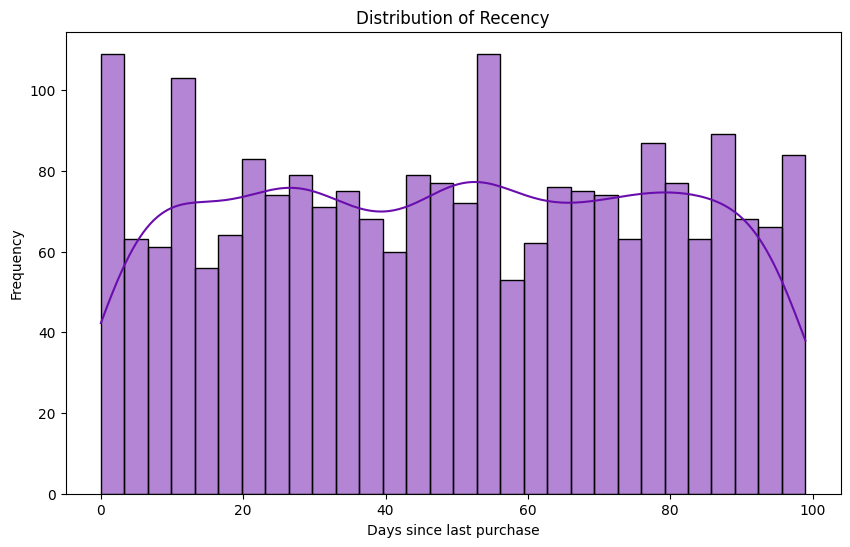

In [182]:
# Distribution of Recency
plt.figure(figsize=(10, 6))
sns.histplot(df_new['Recency'], bins=30, kde=True, color='#6a0dad')
plt.title('Distribution of Recency')
plt.xlabel('Days since last purchase')
plt.ylabel('Frequency')
plt.show()

The distribution of Recency in the data shows distinct peaks on specific days (around 0, 10, 30, 50, and 90 days). These high-frequency days indicate increased purchasing activity from customers, although the overall distribution of Recency does not follow a normal pattern.

Action Plan

`On-site Branding:`

- Target Day 0: Customers who have just made a purchase. Enhance in-store branding to encourage impulse purchases.
- Target Day 10: Customers who tend to return within 10 days. Display special promotional banners in-store to capture their attention.

`Email Marketing Campaigns:`

- Day 30 and Day 50: Send promotional or reminder emails a few days before customers typically return, incentivizing them to shop again with special offers or discounts.

`Social Media Promotions:`

- Day 90: Use social media to remind and promote products to customers who tend to return after a longer period.

`Store Layout Optimization:`

- General: Optimize store layout to maximize exposure to products frequently purchased by customers with high Recency on these specific days.
With this action plan, you can leverage Recency data to enhance customer retention and drive more in-store purchases.

#### Segment Spotlight: Unveiling Recency-Based Spending

In [183]:
# Create segments based on Recency
def segment_recency(days):
    if days <= 30:
        return 'Very Recent'
    elif days <= 60:
        return 'Recent'
    elif days <= 90:
        return 'Moderate'
    else:
        return 'Long Time Ago'

df_new['Recency Segment'] = df_new['Recency'].apply(segment_recency)

# Display count of customers in each segment
recency_segment_counts = df_new['Recency Segment'].value_counts()
print(recency_segment_counts)

Recency Segment
Very Recent      724
Moderate         664
Recent           654
Long Time Ago    198
Name: count, dtype: int64


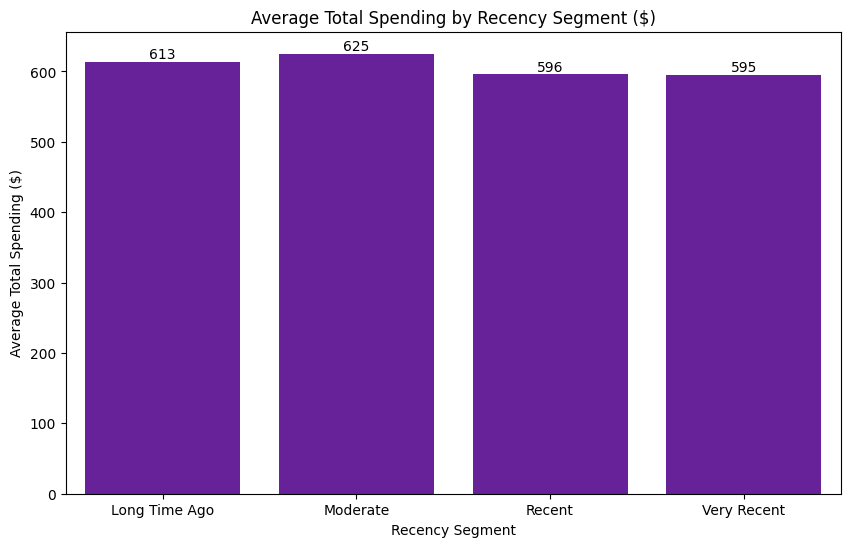

In [184]:
# Calculate average Total Spending by Recency Segment
spending_by_recency_segment = df_new.groupby('Recency Segment')['Total Spending'].mean().reset_index()

# Plotting total spending by recency segment
plt.figure(figsize=(10, 6))
plot = sns.barplot(data=spending_by_recency_segment, x='Recency Segment', y='Total Spending', color='#6a0dad')
plt.title('Average Total Spending by Recency Segment ($)')
plt.xlabel('Recency Segment')
plt.ylabel('Average Total Spending ($)')
# Adding annotations
for index, row in spending_by_recency_segment.iterrows():
    plot.text(index, row['Total Spending'] + 5, round(row['Total Spending']), color='black', ha="center")
plt.show()

While the distribution of customers based on Recency segments is fairly balanced, there is no significant difference observed in the average total spending across segments.

`Action Plan:` Focus on additional promotional strategies or incentives for customers in the 'Very Recent' and 'Moderate' segments to enhance retention and repeat purchases. Given the proximity in behavior, the impact on the 'Recent' segment from strategies targeting 'Moderate' and 'Very Recent' segments could help optimize promotional budgets effectively. Additionally, consider further personalization for the 'Long Time Ago' segment.

## Data Analysis - Campaign Insights Unveiled

Campaign Data Distribution and Response Analysis

In [185]:
# Columns used
campaign_columns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Response']

# Normality test for campaign data and response
normality_results = {}
for col in campaign_columns:
    stat, p = normaltest(df_new[col])
    normality_results[col] = {'stat': stat, 'p-value': p}

# Display results
for key, value in normality_results.items():
    print(f'{key} normality test: stat = {value["stat"]}, p-value = {value["p-value"]}')

Campaign 1 normality test: stat = 1608.7064215330126, p-value = 0.0
Campaign 2 normality test: stat = 3155.124172595476, p-value = 0.0
Campaign 3 normality test: stat = 1485.6762386704095, p-value = 0.0
Campaign 4 normality test: stat = 1461.5140249268186, p-value = 0.0
Campaign 5 normality test: stat = 1485.67623867041, p-value = 0.0
Response normality test: stat = 755.7190160561258, p-value = 7.901339609771405e-165


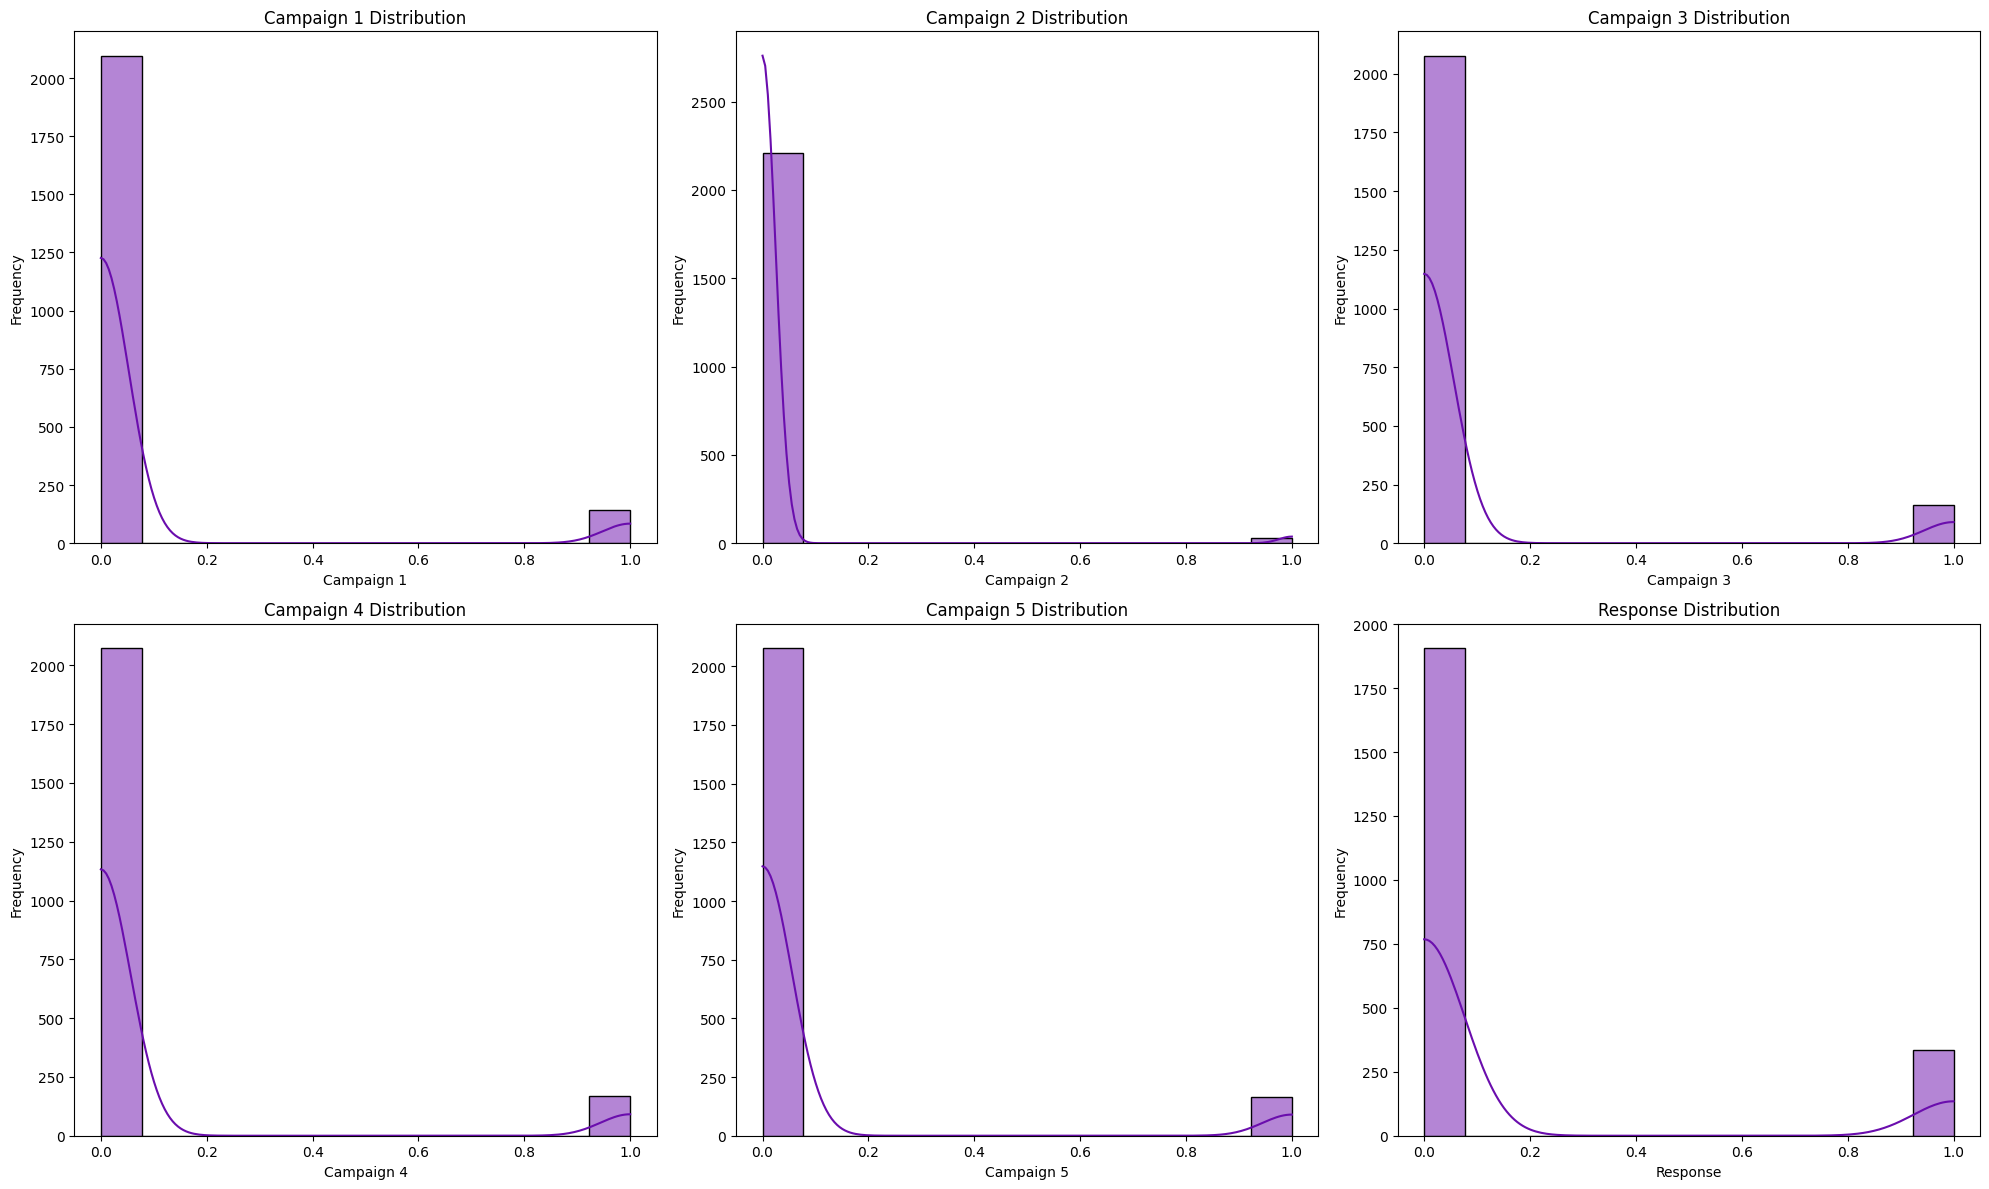

In [186]:
# Columns used
campaign_columns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Response']

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Plot histograms for each campaign column
for i, col in enumerate(campaign_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_new[col], kde=True, color='#6a0dad')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The results of the normality tests indicate that all campaign columns (Campaign 1, Campaign 2, Campaign 3, Campaign 4, Campaign 5) and the response column have very low p-values (close to 0.0), meaning that the data in these columns are not normally distributed. Therefore, non-parametric tests such as the Chi-Square test are more appropriate.

Based on these results, the use of the Chi-Square test is justified because:
- The data are not normally distributed.
- The data are categorical.

All p-values are very low (well below the significance level of 0.05), meaning we can conclude that there is a statistically significant relationship between each campaign and the response. Thus, the initial use of the Chi-Square test was appropriate, and the results indicate a significant relationship between the variables.

Statistical Correlation Between Campaigns and Response

In [187]:
# Columns used
campaign_columns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Response']

# Function to calculate and display Chi-Square test results
def chi2_test(col1, col2):
    contingency_table = pd.crosstab(df_new[col1], df_new[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Test correlation between campaigns and response
chi2_results = []
for col in campaign_columns[:-1]:
    chi2, p = chi2_test(col, 'Response')
    chi2_results.append({'Campaign': col, 'Chi2': chi2, 'p-value': p})

# Create DataFrame to display results
chi2_df = pd.DataFrame(chi2_results)

# Display the DataFrame
print(chi2_df)

     Campaign        Chi2       p-value
0  Campaign 1  190.241783  2.815498e-43
1  Campaign 2   60.130297  8.878118e-15
2  Campaign 3  142.074884  9.364996e-33
3  Campaign 4   68.312456  1.395368e-16
4  Campaign 5  235.467749  3.828045e-53


Campaign Effectiveness Analysis:

Campaign 1 vs Response:
- Chi-Square = 190.24, p-value = 2.82e-43
- Very strong association between Campaign 1 and the overall Response.

Campaign 2 vs Response:
- Chi-Square = 60.13, p-value = 8.88e-15
- Significant association between Campaign 2 and the overall Response.

Campaign 3 vs Response:
- Chi-Square = 142.07, p-value = 9.36e-33
- Strong association between Campaign 3 and the overall Response.

Campaign 4 vs Response:
- Chi-Square = 68.31, p-value = 1.40e-16
- Significant association between Campaign 4 and the overall Response.

Campaign 5 vs Response:
- Chi-Square = 235.47, p-value = 3.83e-53
- Very strong association between Campaign 5 and the overall Response.

All campaign offers show a statistically significant relationship with the customer's response to the last campaign. This indicates that customers who responded positively to earlier campaigns are more likely to respond positively to future campaigns.

Campaign 5 has the highest chi-square value, indicating the strongest association with customer response.

Possible Reasons for the Strong Association:

- More Attractive Offer: Campaign 5 might have offered more attractive or relevant deals to customers, making it more likely for them to respond positively. This could include bigger discounts, highly desired products, or exclusive offers.
- Increased Customer Trust: Customers who responded positively to previous campaigns may have developed more trust in the company's offers. By Campaign 5, this trust could have peaked, leading to a higher response rate.
- Better Customer Segmentation: Campaign 5 might have used more refined customer segmentation, ensuring that the offers were highly targeted and relevant to the recipients' preferences and buying behavior.
- Improved Communication Channels: There might have been improvements in the communication strategies used in Campaign 5, such as more effective email marketing, better-targeted ads, or personalized messages that resonated more with the customers.
- Optimal Timing: The timing of Campaign 5 might have been more optimal, possibly aligning with periods when customers are more likely to make purchases, such as during holidays or promotional seasons.

Action Plan

`Leverage Past Campaign Data:`
- Utilize customer response data from previous campaigns to tailor future offers.
- Target customers who have responded positively to earlier campaigns with personalized and attractive offers.

`Maximize Web Platform Potential:`

- Enhance User Experience: Improve website interface and user experience to make online shopping more appealing.
- Personalized Online Offers: Use data-driven insights to create personalized offers for web purchases, targeting customers based on their purchase history and campaign responses.
- Promotional Campaigns: Launch targeted web-exclusive promotions and discounts to drive more traffic and sales through the online platform.

`Campaign Optimization:`

- Analyze Campaign Patterns: Conduct a deeper analysis of customer demographics and preferences to understand which segments are more responsive to certain campaigns.
- Test and Iterate: Implement A/B testing for different campaign strategies to determine the most effective approaches.
- Cross-Channel Integration: Ensure consistent messaging and offers across both online and offline channels to provide a seamless customer experience.

`Focus on High-Value Customers:` 
- Identify high-value customers who consistently respond to campaigns and create loyalty programs to retain them.
- Offer exclusive deals and rewards to high-value customers to incentivize repeat purchases.

By leveraging the insights from the campaign analysis and focusing on maximizing the potential of the web platform, the business can enhance its marketing strategies, improve customer engagement, and drive higher sales and retention rates.

## Conclusion and Future Work

Summary Key Findings:
- `Customer Spending Behavior:` Customers allocate only 0.58% of their monthly income on average to supermarket purchases, indicating potential for increased spending with targeted strategies.

- `Marital Status and Education:` Majority of customers are in relationships and have postgraduate education, suggesting a focus on premium products and family-oriented offerings.

- `Product Preferences:` High spending is observed on wines, meats, and gold, with lower spending on fish, sweets, and fruits, highlighting opportunities for product diversification.

- `Purchase Methods:` Store purchases dominate, but there's growing importance of web purchases, suggesting a need to enhance online marketing and sales strategies.

- `Campaign Effectiveness:` All campaigns (Campaigns 1-5) show significant associations with customer response, with Campaign 5 exhibiting the strongest impact.

Final Strategic Recommendations:
- `Diversification of Product Offerings:` Introduce new products and promotions tailored to family needs, including holiday package promotions to increase average transaction value.

- `Enhanced Digital Marketing:` Optimize online platforms with personalized offers and targeted promotions, particularly for high-spending segments like customers with families.

- `Segment-Specific Campaigns:` Develop marketing campaigns that resonate with different demographic segments (e.g., couples, families, singles) based on spending behaviors and preferences.

- `Cross-Channel Integration:` Integrate online and offline channels to provide a seamless customer experience, promoting family-oriented products and holiday packages consistently.

- `Loyalty Programs and Incentives:` Implement loyalty programs with rewards for repeat purchases and high-value customer segments, including incentives for purchasing holiday packages and family-oriented products.

By focusing on these strategic recommendations, businesses can leverage customer insights to drive engagement, increase spending, and foster long-term loyalty, particularly through targeted promotions such as holiday packages for families.